# Bank Customer Churn Prediction

### https://www.akkio.com/post/bank-churn-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
# check records
df.shape

(165034, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# remove first 3 columns
d = df.copy()
d.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
d.drop(columns=['id','CustomerId','Surname'],inplace=True)

In [10]:
d.shape

(165034, 11)

In [11]:
# NaN
d.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

(array([4.9860e+03, 9.9801e+04, 4.3319e+04, 1.2186e+04, 4.6830e+03,
        5.9000e+01]),
 array([18., 25., 40., 50., 60., 80., 95.]),
 <BarContainer object of 6 artists>)

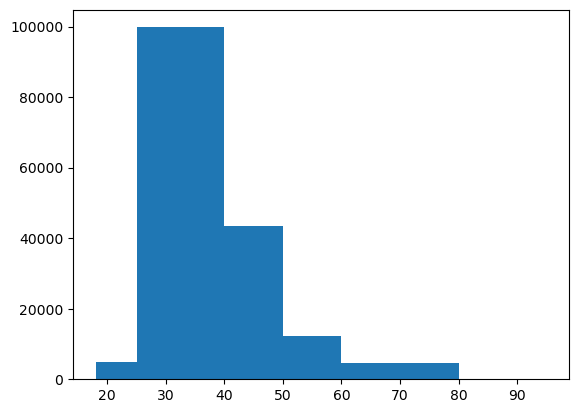

In [15]:
#d.Age.plot(kind='hist')
plt.hist(d.Age,bins=[18,25,40,50,60,80,95])

In [17]:
# select categorical columns
d.select_dtypes('object').value_counts()

Geography  Gender
France     Male      54239
           Female    39976
Spain      Male      20693
Germany    Male      18218
           Female    16388
Spain      Female    15520
Name: count, dtype: int64

In [18]:
# target variable contains 0,1
d.Exited.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Exited', ylabel='count'>

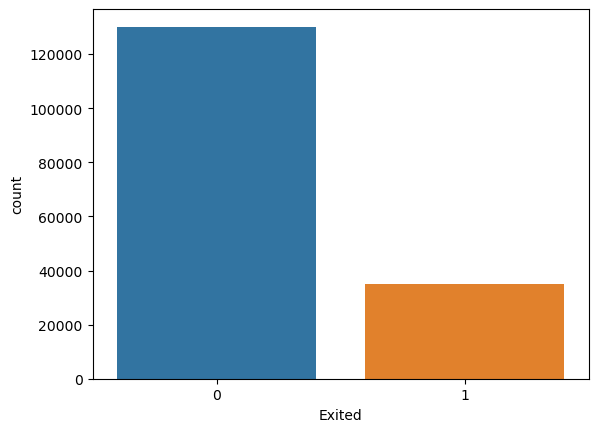

In [19]:
sns.countplot(data=d,x='Exited')

In [24]:
d.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [27]:
d.Geography = d.Geography.map({'France':0, 'Spain':1, 'Germany':2})

In [28]:
d.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [29]:
d.Gender = d.Gender.map({'Male':0, 'Female':1})

In [31]:
d.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [33]:
# split the data
X = d.iloc[:,:-1]
X[:2]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,0,33.0,3,0.0,2,1.0,0.0,181449.97
1,627,0,0,33.0,1,0.0,2,1.0,1.0,49503.50


In [34]:
y = d.Exited
y[:2]

0    0
1    0
Name: Exited, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [32]:
# import Logist Regression
from sklearn.linear_model import LogisticRegression

In [37]:
LR = LogisticRegression()

In [38]:
LR.fit(X_train,y_train)

LogisticRegression()

In [42]:
# testing
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Performance Metrics/Accuracy Measures

## Confusion Matrix: TP, TN, FP, FN
- Accuracy
- Precision
- Recall
- F1_score

### These metrics are used to Check the model performance

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[25120,   912],
       [ 6178,   797]], dtype=int64)

In [48]:
# Actual=0 and Predicted=0
sum((y_test ==0) & (y_pred ==0))

25120

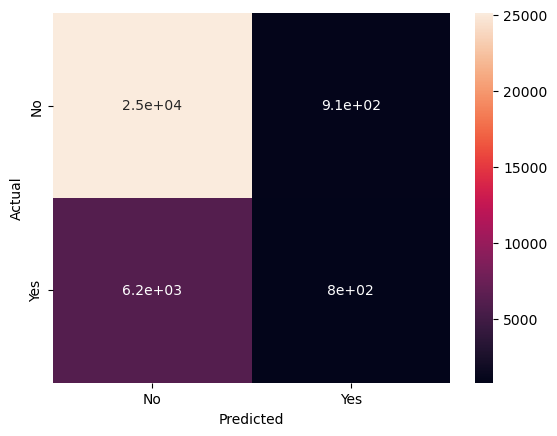

In [54]:
sns.heatmap(cm,annot=True,
           xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [55]:
cm

array([[25120,   912],
       [ 6178,   797]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [58]:
accuracy_score(y_test,y_pred)*100

78.51970794073985

In [59]:
precision_score(y_test,y_pred)*100

46.63545933294324

In [60]:
recall_score(y_test,y_pred)*100

11.42652329749104

In [61]:
f1_score(y_test,y_pred)*100

18.355596499309073

In [62]:
# summary of all
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88     26032
           1       0.47      0.11      0.18      6975

    accuracy                           0.79     33007
   macro avg       0.63      0.54      0.53     33007
weighted avg       0.73      0.79      0.73     33007



In [67]:
y_train.value_counts()

Exited
0    104081
1     27946
Name: count, dtype: int64

In [63]:
cm

array([[25120,   912],
       [ 6178,   797]], dtype=int64)

In [64]:
len(y_test)

33007

In [65]:
#accuracy = TP+TN/(All predictions)
(25120+797)/33007

0.7851970794073985

In [66]:
accuracy_score(y_test,y_pred)

0.7851970794073985